# Make MasterBias CTIO Data in June 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : July 4th th 2017

### This notebook  the Master Bias from Olivier
-----------------------------------------



In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os

In [43]:
import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [44]:
from astropy.io import fits

In [45]:
from scipy import stats  
from scipy import ndimage
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal

In [46]:
import bottleneck as bn  # numpy's masked median is slow...really slow (in version 1.8.1 and lower)
print 'bottleneck version',bn.__version__

bottleneck version 1.2.0


In [47]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
#from photutils.background import Background2D
from photutils import Background2D, SigmaClip, MedianBackground

In [48]:
from IPython.display import Image, display

In [49]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [50]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [51]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [52]:
imstats = lambda dat: (dat.min(), dat.max(), dat.mean(), dat.std())

In [53]:
inputfile='median_bias.fits'

In [54]:
outputfile="FinalMasterBias_CTIO.fits"

In [55]:
hdulist = fits.open(inputfile)

In [56]:
image=hdulist[0].data

## Transfer the image in CCDData
====================================

In [57]:
master_bias=ccdproc.CCDData(image,unit='adu')

## Result on Master Bias
===============================

In [58]:
bias_min, bias_max, bias_mean, bias_std = imstats(np.asarray(master_bias))

In [59]:
print bias_min, bias_max, bias_mean, bias_std

-227.0 60325.0 8.87590098381 532.100630756


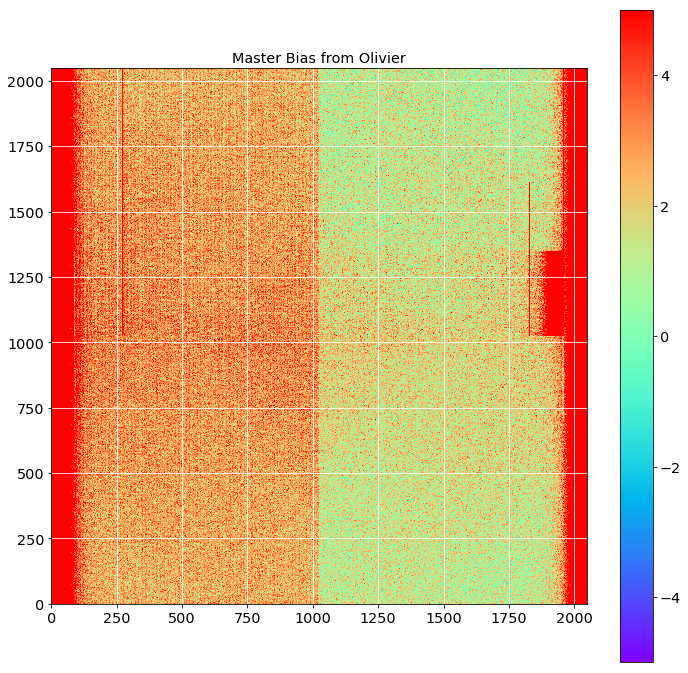

In [60]:
plt.figure(figsize=(12, 12))
#plt.imshow(master_bias, vmax=bias_mean + bias_std, vmin=bias_mean - bias_std)
im=plt.imshow(master_bias,origin='lower',cmap='rainbow',vmin=-5, vmax=5)
plt.grid(color='white', ls='solid')
plt.grid(True)
plt.colorbar()
title='Master Bias from Olivier'
plt.title(title)
plt.savefig('MasterBiasCCD.png')

In [61]:
flatten_bias=master_bias.data.flatten()

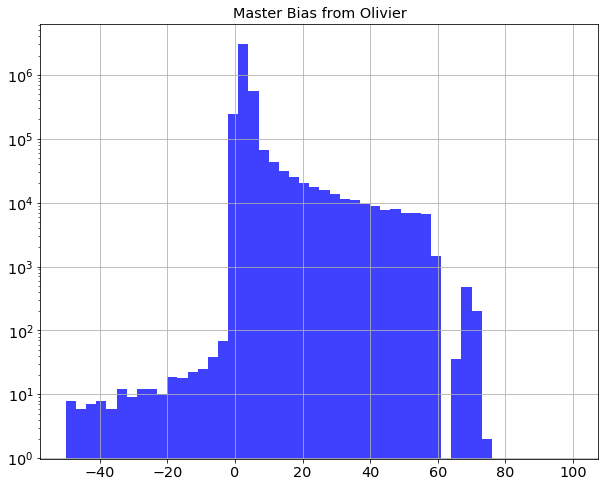

In [62]:
plt.figure(figsize=(10,8))
plt.hist(flatten_bias,bins=50,range=(-50,100),facecolor='blue', alpha=0.75);
plt.yscale('log')
plt.grid(True)
title='Master Bias from Olivier'
plt.title(title)
plt.savefig('MasterBiasHISTO.png')

## Save the Master Bias
----------------------------------------------------------

In [63]:
prihdu = fits.PrimaryHDU(data=master_bias.data)
thdulist = fits.HDUList(prihdu)
thdulist.writeto(outputfile,overwrite=True)